In [1]:
import os
# cd H:\tecky-academy\c17-bad-project-01-tw\data_src
# os.chdir(r"D:\tecky-academy\c17-bad-project-01-tw\data_src")
os.chdir(r"/Users/mich/Documents/T micro/BAD-project/c17-bad-project-01-tw/data_src")

In [2]:
import json
from typing import Reversible
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# read meta
with open('meta_Movies_and_TV.json') as f:
    itemList = []
    for jsonObj in f:
        itemDict = json.loads(jsonObj)
        itemList.append(itemDict)
    df = pd.DataFrame(itemList)
f.close()
df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Movies & TV, Movies]",,[],,Understanding Seizures and Epilepsy,[],,,[],"886,503 in Movies & TV (",[],Movies & TV,,,,0000695009,[],[],NaN
1,"[Movies & TV, Movies]",,[],,Spirit Led&mdash;Moving By Grace In The Holy S...,[],,,[],"342,688 in Movies & TV (",[],Movies & TV,,,,0000791156,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Movies & TV, Movies]",,[Disc 1: Flour Power (Scones; Shortcakes; Sout...,,My Fair Pastry (Good Eats Vol. 9),[],,Alton Brown,[],"370,026 in Movies & TV (",[],Movies & TV,,,,0000143529,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,"[Movies & TV, Movies]",,[Barefoot Contessa Volume 2: On these three di...,,"Barefoot Contessa (with Ina Garten), Entertain...","[B002I5GNW4, B005WXPVMM, B009UY3W8O, B00N27ID1...",,Ina Garten,[],"342,914 in Movies & TV (","[B002I5GNW4, 0804187045, B009UY3W8O, 060960219...",Movies & TV,,,$74.95,0000143588,[],[],NaN
4,"[Movies & TV, Movies]",,[Rise and Swine (Good Eats Vol. 7) includes bo...,,Rise and Swine (Good Eats Vol. 7),"[B000P1CKES, B000NR4CRM]",,Alton Brown,[],"351,684 in Movies & TV (",[B0015SVNXY],Movies & TV,,,,0000143502,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [4]:
# read review
with open('split_review_000.json') as f:
    itemList = []
    for jsonObj in f:
        itemDict = json.loads(jsonObj)
        itemList.append(itemDict)
    df_movies = pd.DataFrame(itemList)
f.close()
# df_movies = pd.read_json('Movies_and_TV1.0.json', orient='records')
df_movies.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"03 11, 2013",A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},jacki,really happy they got evangelised .. spoiler a...,great,1362960000,NaN,NaN
1,5.0,True,"02 18, 2013",A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Ken P,Having lived in West New Guinea (Papua) during...,Realistic and Accurate,1361145600,3,NaN
2,5.0,False,"01 17, 2013",A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Reina Berumen,Excellent look into contextualizing the Gospel...,Peace Child,1358380800,NaN,NaN
3,5.0,True,"01 10, 2013",A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},N Coyle,"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,1357776000,NaN,NaN
4,4.0,True,"12 26, 2012",A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},Jodie Vesely,This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,1356480000,NaN,NaN


In [5]:
df_join = pd.merge(df_movies, df, how='inner', on='asin')
df_join.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,True,"03 11, 2013",A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},jacki,really happy they got evangelised .. spoiler a...,great,1362960000,...,[],"866,012 in Movies & TV (",[],Movies & TV,,,,[],[],NaN
1,5.0,True,"02 18, 2013",A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Ken P,Having lived in West New Guinea (Papua) during...,Realistic and Accurate,1361145600,...,[],"866,012 in Movies & TV (",[],Movies & TV,,,,[],[],NaN
2,5.0,False,"01 17, 2013",A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Reina Berumen,Excellent look into contextualizing the Gospel...,Peace Child,1358380800,...,[],"866,012 in Movies & TV (",[],Movies & TV,,,,[],[],NaN
3,5.0,True,"01 10, 2013",A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},N Coyle,"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,1357776000,...,[],"866,012 in Movies & TV (",[],Movies & TV,,,,[],[],NaN
4,4.0,True,"12 26, 2012",A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},Jodie Vesely,This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,1356480000,...,[],"866,012 in Movies & TV (",[],Movies & TV,,,,[],[],NaN


In [6]:
n_dims = 10

In [7]:
def get_ratings_matrix(df, train_size=0.75):
    user_to_row = {}
    movie_to_column = {}
    df_values = df.values
    parameters = {}
    
    uniq_users = np.unique(df['reviewerID'])
    uniq_movies = np.unique(df['asin'])
    
    # mapping raw reviewerID and asin to new id in rating matrix
    for i, user_id in enumerate(uniq_users):
        user_to_row[user_id] = i

    for j, movie_id in enumerate(uniq_movies):
        movie_to_column[movie_id] = j
    
    n_users = len(uniq_users)
    n_movies = len(uniq_movies)
    
    R = np.zeros((n_users, n_movies))
    
    df_copy = df.copy()
    train_set = df_copy.sample(frac=train_size, random_state=0)
    test_set = df_copy.drop(train_set.index)
    
    for index, row in train_set.iterrows():
        i = user_to_row[row.reviewerID]
        j = movie_to_column[row.asin]
        R[i, j] = row.overall

    return R, train_set, test_set, n_users, n_movies, user_to_row, movie_to_column

R, train_set, test_set, n_users, n_movies, user_to_row, movie_to_column = get_ratings_matrix(df_join, 0.8)
print(R)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
np.sum(R)

280882.0

In [19]:
n_users

72008

In [9]:
parameters = {}

In [10]:
def initialize_parameters(lambda_U, lambda_V):
    U = np.zeros((n_dims, n_users), dtype=np.float64)
    V = np.random.normal(0.0, 1.0 / lambda_V, (n_dims, n_movies))
    
    parameters['U'] = U
    parameters['V'] = V
    parameters['lambda_U'] = lambda_U
    parameters['lambda_V'] = lambda_V

In [11]:
def update_parameters():
    U = parameters['U']
    V = parameters['V']
    lambda_U = parameters['lambda_U']
    lambda_V = parameters['lambda_V']
    
    for i in range(n_users):
        V_j = V[:, R[i, :] > 0]
        U[:, i] = np.dot(np.linalg.inv(np.dot(V_j, V_j.T) + lambda_U * np.identity(n_dims)), np.dot(R[i, R[i, :] > 0], V_j.T))
        
    for j in range(n_movies):
        U_i = U[:, R[:, j] > 0]
        V[:, j] = np.dot(np.linalg.inv(np.dot(U_i, U_i.T) + lambda_V * np.identity(n_dims)), np.dot(R[R[:, j] > 0, j], U_i.T))
        
    parameters['U'] = U
    parameters['V'] = V

In [12]:
def log_a_posteriori():
    lambda_U = parameters['lambda_U']
    lambda_V = parameters['lambda_V']
    U = parameters['U']
    V = parameters['V']
    
    UV = np.dot(U.T, V)
    R_UV = (R[R > 0] - UV[R > 0])
    
    return -0.5 * (np.sum(np.dot(R_UV, R_UV.T)) + lambda_U * np.linalg.norm(U, ord='fro') + lambda_V * np.linalg.norm(V, ord='fro'))

def predict(user_id, movie_id):
    U = parameters['U']
    V = parameters['V']
    
    r_ij = U[:, user_to_row[user_id]].T.reshape(1, -1) @ V[:, movie_to_column[movie_id]].reshape(-1, 1)

    max_rating = parameters['max_rating']
    min_rating = parameters['min_rating']

    return 0 if max_rating == min_rating else ((r_ij[0][0] - min_rating) / (max_rating - min_rating)) * 5.0

def evaluate(dataset):
    ground_truths = []
    predictions = []
    
    for index, row in dataset.iterrows():
        ground_truths.append(row.loc['overall'])
        predictions.append(predict(row.loc['reviewerID'], row.loc['asin']))
    
    return mean_squared_error(ground_truths, predictions, squared=False)

def update_max_min_ratings():
    U = parameters['U']
    V = parameters['V']

    R = U.T @ V
    min_rating = np.min(R)
    max_rating = np.max(R)

    parameters['min_rating'] = min_rating
    parameters['max_rating'] = max_rating

def train(n_epochs):
    initialize_parameters(0.3, 0.3)
    log_aps = []
    rmse_train = []
    rmse_test = []

    update_max_min_ratings()
    rmse_train.append(evaluate(train_set))
    rmse_test.append(evaluate(test_set))
    
    for k in range(n_epochs):
        update_parameters()
        log_ap = log_a_posteriori()
        log_aps.append(log_ap)

        if (k + 1) % 10 == 0:
            update_max_min_ratings()

            rmse_train.append(evaluate(train_set))
            rmse_test.append(evaluate(test_set))
            print('Log p a-posteriori at iteration', k + 1, ':', log_ap)

    update_max_min_ratings()

    return log_aps, rmse_train, rmse_test

In [13]:
log_ps, rmse_train, rmse_test = train(150)

Log p a-posteriori at iteration 10 : -107.12586895836458
Log p a-posteriori at iteration 20 : -65.3111003766397
Log p a-posteriori at iteration 30 : -56.78832688467588
Log p a-posteriori at iteration 40 : -53.41865058706435
Log p a-posteriori at iteration 50 : -51.559201823096174
Log p a-posteriori at iteration 60 : -50.383087519711964
Log p a-posteriori at iteration 70 : -49.578777906487815
Log p a-posteriori at iteration 80 : -49.002091961375456
Log p a-posteriori at iteration 90 : -48.5787882984292
Log p a-posteriori at iteration 100 : -48.26232241904795
Log p a-posteriori at iteration 110 : -48.02028405973871
Log p a-posteriori at iteration 120 : -47.83196394345315
Log p a-posteriori at iteration 130 : -47.684036016697924
Log p a-posteriori at iteration 140 : -47.56793100666991
Log p a-posteriori at iteration 150 : -47.477247958062705


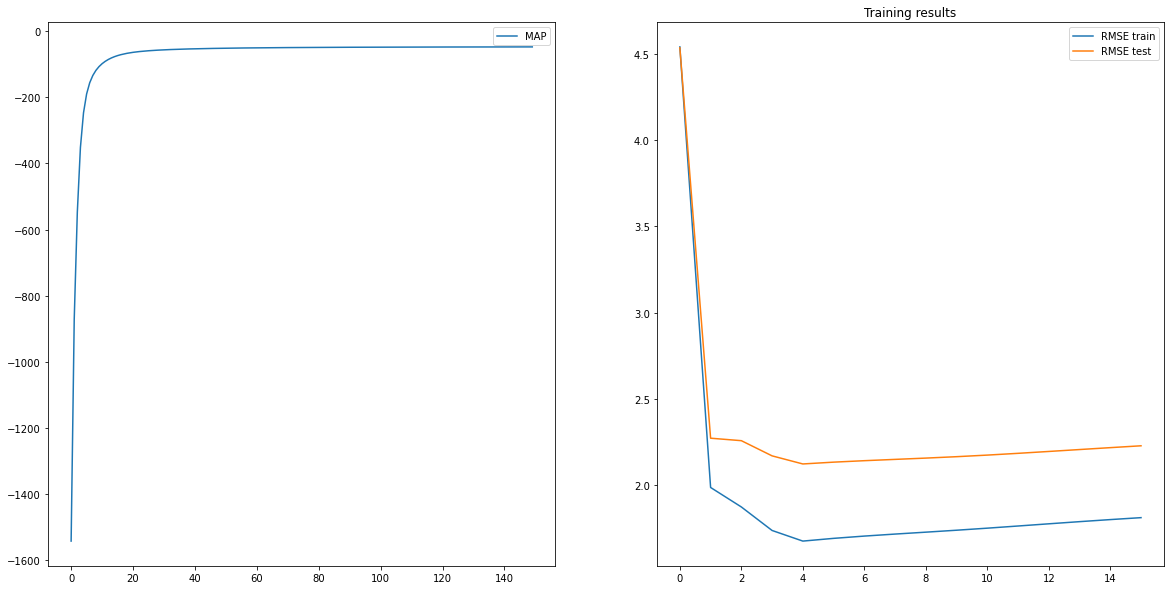

In [14]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.title('Training results')
ax1.plot(np.arange(len(log_ps)), log_ps, label='MAP')
ax1.legend()

ax2.plot(np.arange(len(rmse_train)), rmse_train, label='RMSE train')
ax2.plot(np.arange(len(rmse_test)), rmse_test, label='RMSE test')
ax2.legend()

plt.show()

In [15]:
print('RMSE of training set:', evaluate(train_set))
print('RMSE of testing set:', evaluate(test_set))

RMSE of training set: 1.8113967866910545
RMSE of testing set: 2.2277596549610057


In [16]:
user_id = "A3478QRKQDOPQ2"
df_join[df_join['reviewerID'] == user_id].sort_values(by=['overall'], ascending=False).head(10)
df_join[df_join['reviewerID'] == user_id].sort_values(by=['overall']).head(10)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
54331,4.0,True,"03 4, 2014",A3478QRKQDOPQ2,0783225911,{'Format:': ' VHS Tape'},jacki,i think she tried to convert him and forgot if...,good evangelism story,1393891200,...,[],"430,594 in Movies & TV (","[B06XGX1FKS, B0045HCJSK, B072ZMMWZQ, B00008CMR...",Movies & TV,,,,[],[],NaN
0,5.0,True,"03 11, 2013",A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},jacki,really happy they got evangelised .. spoiler a...,great,1362960000,...,[],"866,012 in Movies & TV (",[],Movies & TV,,,,[],[],NaN


In [17]:
# look up most likely preferences
predictions = np.zeros((n_movies, 1))
movie_to_column_items = np.array(list(movie_to_column.items()))
df_result = pd.DataFrame(columns=['reviewerID','asin','title','prediction'])

for i, movie in enumerate(movie_to_column_items):
    predictions[i] = predict(user_id, movie[0])
    
indices = np.argsort(-predictions, axis=0)

for j in range(10):
    movie_id = movie_to_column_items[np.where(movie_to_column_items[:, 1] == str(indices[j][0]))][0][0]
    df_row = pd.DataFrame({
        'reviewerID': user_id,
        'asin': movie_id,
        'title': df_join[df_join['asin'] == movie_id].iloc[0]['title'],
        'prediction': predictions[indices[j]][0][0]
    }, index=[j])
    df_result = df_result.append(df_row, sort=False)
df_result

,reviewerID,asin,title,prediction
0,A3478QRKQDOPQ2,0767853636,Annie,3.916966
1,A3478QRKQDOPQ2,0783116926,The Changeling,3.611011
2,A3478QRKQDOPQ2,0782008372,Highlander: Director's Cut,3.397917
3,A3478QRKQDOPQ2,0767824555,Hard Times,3.378792
4,A3478QRKQDOPQ2,0767834739,Resident Evil: Apocalypse,3.245259
5,A3478QRKQDOPQ2,0788812467,Old Yeller VHS,3.159047
6,A3478QRKQDOPQ2,0783239408,Belleza Americana American Beauty VHS,3.134294
7,A3478QRKQDOPQ2,0784011680,Chaplin,3.098462
8,A3478QRKQDOPQ2,0767811089,The Fisher King,3.091258
9,A3478QRKQDOPQ2,0780020715,Beauty and The Beast The Criterion Collection,3.087330


In [20]:
os.chdir("/Users/mich/Documents/T micro/BAD-project/c17-bad-project-01-tw/data_src/eachjson")

In [18]:
# look up most likely preferences
for user_id in df_join['reviewerID']:
    predictions = np.zeros((n_movies, 1))
    movie_to_column_items = np.array(list(movie_to_column.items()))
    df_result = pd.DataFrame(columns=['reviewerID','asin','title','prediction'])

    for i, movie in enumerate(movie_to_column_items):
        predictions[i] = predict(user_id, movie[0])

    indices = np.argsort(-predictions, axis=0)

    for j in range(10):
        movie_id = movie_to_column_items[np.where(movie_to_column_items[:, 1] == str(indices[j][0]))][0][0]
        df_row = pd.DataFrame({
            'reviewerID': user_id,
            'asin': movie_id,
            'title': df_join[df_join['asin'] == movie_id].iloc[0]['title'],
            'prediction': predictions[indices[j]][0][0]
        }, index=[j])
        df_result = df_result.append(df_row, sort=False)
    df_result.to_json(f'{user_id}.json',orient='records')

KeyboardInterrupt: 